In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#EX 1
data = {
    'Mois': ['Janvier', 'Février', 'Mars', 'Avril'],
    'Produit': ['Produit A', 'Produit B', 'Produit A', 'Produit C'],
    'Quantité': [100, 150, 80, 120],
    'Prix_Unitaire': [10, 20, 15, 8],
    'Région': ['Nord', 'Sud', 'Est', 'Ouest']
}
sample = pd.DataFrame(data)

# 2 Calculez le revenu total (Quantité * Prix_Unitaire) pour chaque produit.
sample['Revenu_Total'] = sample['Quantité'] * sample['Prix_Unitaire']
print("\nRevenu total pour chaque produit :")
print(sample.groupby('Produit')['Revenu_Total'].sum())

# 3. Identifiez le produit le plus vendu dans chaque région
produit_plus_vendu_par_region = sample.groupby(['Région', 'Produit'])['Quantité'].sum().reset_index()
produit_plus_vendu_par_region = produit_plus_vendu_par_region.sort_values(by='Quantité', ascending=False)
produit_plus_vendu_par_region = produit_plus_vendu_par_region.drop_duplicates(subset='Région', keep='first')
print("\nProduit le plus vendu dans chaque région :")
print(produit_plus_vendu_par_region)

# 4. Trouvez le mois avec le revenu total le plus élevé.
mois_revenu_max = sample.groupby('Mois')['Revenu_Total'].sum().idxmax()
print("\nMois avec le revenu total le plus élevé :")
print(mois_revenu_max)


Revenu total pour chaque produit :
Produit
Produit A    2200
Produit B    3000
Produit C     960
Name: Revenu_Total, dtype: int64

Produit le plus vendu dans chaque région :
  Région    Produit  Quantité
3    Sud  Produit B       150
2  Ouest  Produit C       120
1   Nord  Produit A       100
0    Est  Produit A        80

Mois avec le revenu total le plus élevé :
Février


Calculer la note moyenne de chaque étudiant :
Février

Identifier l'étudiant avec la meilleure moyenne :
Étudiant_ID        2.0
Mathématiques     90.0
Anglais           65.0
Français          75.0
Physique          70.0
Chimie           100.0
Biologie           NaN
Moyenne           67.0
Name: 1, dtype: float64

Identifier la matière avec la note moyenne la plus élevée :
87.5

Identifier les étudiants qui ont échoué dans une ou plusieurs matières :
   Étudiant_ID  Mathématiques  Anglais  Français  Physique  Chimie  Biologie  \
2            3           70.0     80.0       NaN         0     0.0      80.0   

     Moyenne  
2  38.833333  


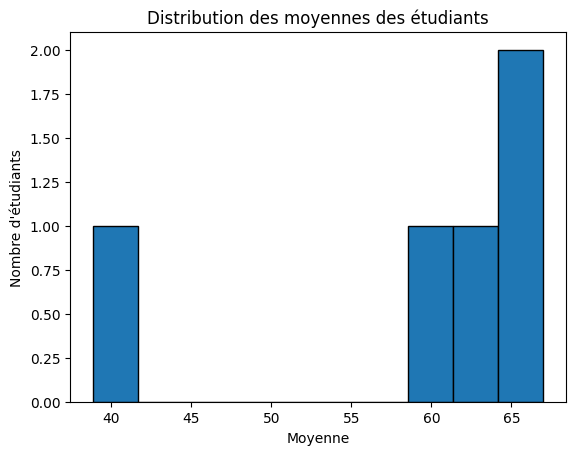

In [ ]:
#EX 2
data = {
    "Étudiant_ID": [1, 2, 3, 4, 5],
    "Mathématiques": [80, 90, 70, None, 60],
    "Anglais": [70, 65, 80, 75, None],
    "Français": [85, 75, None, 60, 70],
    "Physique": [60, 70, 0, 55, 80],
    "Chimie": [None, 100, 0, 100, 50],
    "Biologie": [90, None, 80, 85, 95]
}

sample = pd.DataFrame(data)

# 2. Calculer la note moyenne de chaque étudiant
sample["Moyenne"] = sample.mean(axis=1)
print("Calculer la note moyenne de chaque étudiant :")
print(mois_revenu_max)

# 3. Identifier l'étudiant avec la meilleure moyenne
meilleur_etudiant = sample.loc[sample["Moyenne"].idxmax()]
print("\nIdentifier l'étudiant avec la meilleure moyenne :")
print(meilleur_etudiant)

# 4. Identifier la matière avec la note moyenne la plus élevée
moyenne_par_matiere = sample.mean()
meilleure_matiere = moyenne_par_matiere.idxmax()
meilleure_note_matiere = moyenne_par_matiere.max()
print("\nIdentifier la matière avec la note moyenne la plus élevée :")
print(meilleure_note_matiere)

# 5. Identifier les étudiants qui ont échoué dans une ou plusieurs matières
etudiants_echoues = sample[sample.iloc[:, 1:].lt(50).any(axis=1)]
print("\nIdentifier les étudiants qui ont échoué dans une ou plusieurs matières :")
print(etudiants_echoues)

# 6. Créer un graphique montrant la distribution des moyennes des étudiants
sample["Moyenne"].plot(kind='hist', bins=10, edgecolor='black')
plt.xlabel('Moyenne')
plt.ylabel('Nombre d\'étudiants')
plt.title('Distribution des moyennes des étudiants')
plt.show()

In [ ]:
# Données du premier DataFrame
data1 = {
    "id_produit": [1, 2, 3, 4],
    "nom_produit": ["Produit A", "Produit B", "Produit C", "Produit D"],
    "prix_unitaire": [10, 15, 12, 8],
    "categorie": ["Catégorie 1", "Catégorie 2", "Catégorie 1", "Catégorie 2"]
}

# Données du deuxième DataFrame
data2 = {
    "id_vente": [101, 102, 103, 104],
    "id_produit": [1, 2, 3, 4],
    "quantite": [5, 3, 6, 4],
    "date": ["2023-07-01", "2023-07-02", "2023-07-03", "2023-07-04"]
}

# Création des DataFrames
df_produits = pd.DataFrame(data1)
df_ventes = pd.DataFrame(data2)

# Fusionner les deux DataFrames en utilisant la clé id_produit et stocker le résultat dans df_fusion
df_fusion = df_ventes.merge(df_produits, on='id_produit')

# Calculer le chiffre d'affaires de chaque vente en ajoutant une colonne 'ca' au DataFrame df_fusion
df_fusion['ca'] = df_fusion['quantite'] * df_fusion['prix_unitaire']
print("Résultat de la fusion des DataFrames :")
print(df_fusion)

# Calculer le chiffre d'affaires total par produit en utilisant la méthode groupby sur le DataFrame df_fusion
ca_par_produit = df_fusion.groupby(['id_produit', 'nom_produit'])['ca'].sum().reset_index()
print("\nChiffre d'affaires total par produit :")
print(ca_par_produit)

# Calculer le chiffre d'affaires total par catégorie en utilisant la méthode groupby sur le DataFrame df_fusion
ca_par_categorie = df_fusion.groupby('categorie')['ca'].sum().reset_index()
print("\nChiffre d'affaires total par catégorie :")
print(ca_par_categorie)







Résultat de la fusion des DataFrames :
   id_vente  id_produit  quantite        date nom_produit  prix_unitaire  \
0       101           1         5  2023-07-01   Produit A             10   
1       102           2         3  2023-07-02   Produit B             15   
2       103           3         6  2023-07-03   Produit C             12   
3       104           4         4  2023-07-04   Produit D              8   

     categorie  ca  
0  Catégorie 1  50  
1  Catégorie 2  45  
2  Catégorie 1  72  
3  Catégorie 2  32  

Chiffre d'affaires total par produit :
   id_produit nom_produit  ca
0           1   Produit A  50
1           2   Produit B  45
2           3   Produit C  72
3           4   Produit D  32

Chiffre d'affaires total par catégorie :
     categorie   ca
0  Catégorie 1  122
1  Catégorie 2   77
